# Perceptron Model

A perception is a **linear classifier** that separates data into two classes by a line.

$$y = f(\mathbf{w}^T \mathbf{x} + b)$$

$\mathbf{x}$ are your inputs, $\mathbf{w}$ are the weights of each of the nodes, $y$ is the output.

![img](https://i.imgur.com/E3TugXA.png)

Where $f$ is the step function
$f(z) = 0$ if $z < 0$, $f(z) = 1$ if $z \ge 0$.

**Linearly separable data**: Data points of two or more classes that
can be separated by **hyper-planes**.
![img2](https://upload.wikimedia.org/wikipedia/commons/a/af/Linearly_separable_red-blue_cropped_.svg)

*    **Hyper-plane**: A **subspace** whose dimension is 1 less than the space you're working with. So in 2D, a hyperplane is a **line**, in 3D it's a plane.

*    **Subspace**: Space whose points are closed addition and scalar multiplication.

**Linearly non-separable data**: Data points of 2 or more classes that can't be separated by hyper-planes.

![img](https://online.stat.psu.edu/onlinecourses/sites/stat508/files/lesson11/not_seperable_01.png)

**Decision Boundary**: The region in which the classifier is ambiguous. This is a characteristic of the **model**, not the data. For a perceptron, this decision boundary is a line. So if we're working with linearly separable data, we can form a perfect classifier for the data, whereas if we're working with linearly non-separable data, a perceptron model can't be a perfect fit to the data.


# Multi-layer Perceptron



A perception with additional layers.
![ex](https://i.imgur.com/06NEf5s.png)

$$y = f (f(w_1 x_1 + w_2 x_2 + b_1) + f(w_1 x_1 + w_2 x_2 + b_2) – b_3)$$

## Activation Function

For an MLP, the activation functions for the hidden and output layers don't need to be the heaviside step function. You can use  other options such as a sigmoid function, and we still call it a multi-layer perceptron.


## What will the decision boundary look like?

The decision boundary can be **nonlinear** for a multilayer perceptron.

By adding more layers, we can have a more complex decision boundary and a model with more parameters, allowing it to fit to linearly nonseparable datasets.

Sigmoid activation function: $f(z) = 1 / (1 + e^{-z})$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 -
0.5) - 0.5)

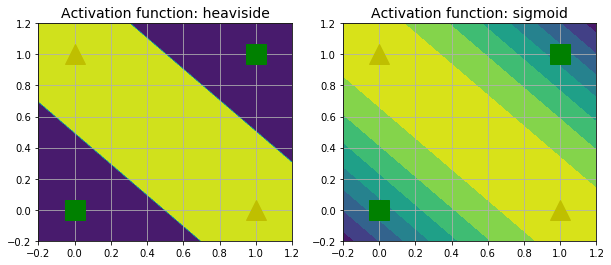

In [3]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)
z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)
plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

Output of stpe function activation function is 0 or 1:

In [10]:
z2[0:4]
# if output of sigmoid function is less than 1/2,  then it belongs to class 0
# if output of sigmoind function is > 1/2, it belongs to class 1

array([[0.4155525 , 0.41586968, 0.416187  , 0.41650443, 0.41682188,
        0.41713932, 0.41745666, 0.41777386, 0.41809084, 0.41840753,
        0.41872388, 0.41903982, 0.41935528, 0.41967019, 0.41998448,
        0.42029807, 0.42061091, 0.42092292, 0.42123402, 0.42154415,
        0.42185323, 0.42216118, 0.42246793, 0.4227734 , 0.42307753,
        0.42338022, 0.42368141, 0.42398102, 0.42427896, 0.42457517,
        0.42486956, 0.42516205, 0.42545257, 0.42574103, 0.42602736,
        0.42631147, 0.42659329, 0.42687273, 0.42714972, 0.42742417,
        0.427696  , 0.42796514, 0.42823151, 0.42849502, 0.4287556 ,
        0.42901317, 0.42926764, 0.42951895, 0.42976701, 0.43001174,
        0.43025307, 0.43049092, 0.43072522, 0.43095588, 0.43118284,
        0.43140603, 0.43162536, 0.43184077, 0.43205218, 0.43225953,
        0.43246275, 0.43266176, 0.4328565 , 0.43304691, 0.43323291,
        0.43341445, 0.43359147, 0.43376389, 0.43393166, 0.43409473,
        0.43425303, 0.43440651, 0.43455512, 0.43

# Overview of Datasets We've Covered

## Iris Dataset

A dataset consisting of 3 different types of iris flowers: Setosa, Versicolour, and Virginica, with their petal length and sepal length. When considering Iris-Setosa vs non-Iris-Setosa, the dataset is **linearly separable**.

Text(0.5, 1.0, 'Iris dataset')

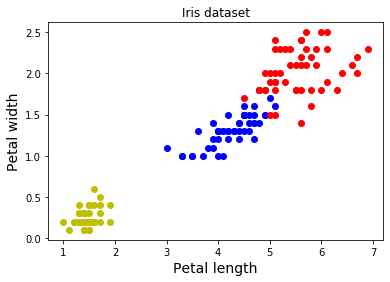

In [5]:
from sklearn.datasets import load_iris
iris = load_iris() # default dataset
X = iris.data[:, (2, 3)] # petal length, petal width
y = iris.target
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "bo", label="Iris-Versicolour")
plt.plot(X[y==2, 0], X[y==2, 1], "ro", label="Iris-Virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("Iris dataset")

# Moons Dataset

A dataset featuring two interleaving half-circles. This dataset is *not* linearly separable.

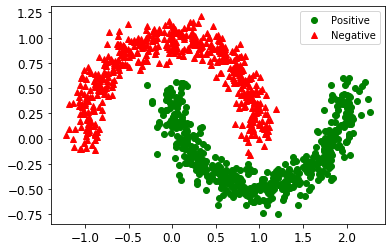

In [6]:
from sklearn.datasets import make_moons

m = 1000
X_moons, y_moons = make_moons(m, noise=0.1, random_state=42)

#plot
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.plot(X_moons[y_moons == 1, 0], X_moons[y_moons == 1, 1], 'go',
label="Positive")
plt.plot(X_moons[y_moons == 0, 0], X_moons[y_moons == 0, 1], 'r^',
label="Negative")
plt.legend()
plt.show()

# XOR dataset

A dataset from the XOR operator: This is a simple dataset that is **not** linearly separable.

| x | y | Class |
| --- | --- | --- |
| 0 | 0 | 0 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 0 |

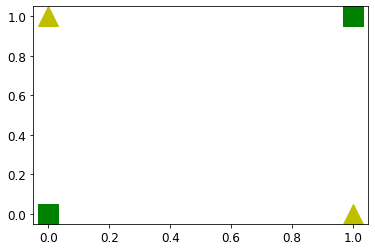

In [7]:
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)

# Logistic Regression

Will probably cover this in more detail on Thursday, but the idea is:

**Logistic Regression is Perceptron, except the activation function is the sigmoid function**.

### Perceptron

$$y = \text{heaviside}(\mathbf{w}^T \mathbf{x} + b)$$

### Logistic Regression

$$y = \text{sigmoid}(\mathbf{w}^T \mathbf{x} + b)$$


The **decision boundary** is still a **hyperplane** (line in 2D):
$$\{x \colon \text{sigmoid}(\mathbf{w}^T \mathbf{x} + b) = 1/2\}$$

In [12]:
#add an extra bias feature (x0=1) to every instance: add a column of 1’s on
#the left of input matrix 𝐗
X_moons_with_bias = np.c_[np.ones((m, 1)), X_moons]
X_moons_with_bias[:5] #display

#reshape y_train into a column vector
y_moons_column_vector = y_moons.reshape(-1, 1)
# data split
test_ratio = 0.2
test_size = int(m * test_ratio)
X_train = X_moons_with_bias[:-test_size]
X_test = X_moons_with_bias[-test_size:]
y_train = y_moons_column_vector[:-test_size]
y_test = y_moons_column_vector[-test_size:]

# random batch function
def random_batch(X_train, y_train, batch_size):
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return X_batch, y_batch


#display a batch of size 5
X_batch, y_batch = random_batch(X_train, y_train, 5)
print(X_batch)

#display y_batch
print(y_batch)

#define model (1) and initialize
import tensorflow as tf
import numpy as np
n_inputs = 2
tf.compat.v1.disable_eager_execution()


X = tf.compat.v1.placeholder(tf.float32, shape=(None, n_inputs + 1), name="X")
y = tf.compat.v1.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random.uniform([n_inputs + 1, 1], -1.0, 1.0, seed=42),
name="theta")
logits = tf.matmul(X, theta, name="logits")
y_proba = tf.sigmoid(logits)


loss = tf.compat.v1.losses.log_loss(y, y_proba)
learning_rate = 0.01
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
init = tf.compat.v1.global_variables_initializer()

n_epochs = 200
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

axes = [-1.25, 2.25, -.75, 1.25]
x0, x1 = np.meshgrid(
 np.linspace(axes[0], axes[1], 400).reshape(-1, 1),
 np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
 )
X_new = np.c_[np.ones((80000, 1)),x0.ravel(), x1.ravel()]

with tf.compat.v1.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            loss_val = loss.eval({X: X_test, y: y_test})
        if epoch % 100 == 0:
            print("Epoch:", epoch, "\tLoss:", loss_val)
            y_proba_val = y_proba.eval(feed_dict={X: X_test, y: y_test})
    y_proba_val = y_proba.eval(feed_dict={X: X_test})
    y_proba_val2 = y_proba.eval(feed_dict={X: X_new})

[[ 1.         -0.7805163   0.4411743 ]
 [ 1.          0.61370557 -0.24236929]
 [ 1.          0.16853385  0.15669452]
 [ 1.          0.28271921  0.84638678]
 [ 1.         -0.61487864  0.78298668]]
[[0]
 [1]
 [1]
 [0]
 [0]]
Epoch: 0 	Loss: 0.8769182
Epoch: 100 	Loss: 0.35170197


In [13]:
y_pred = np.round(y_proba_val) # round probability to 0 or 1
x=tf.compat.v1.placeholder(tf.int32,None)
y=tf.compat.v1.placeholder(tf.int32,None)
acc, acc_op=tf.compat.v1.metrics.accuracy(labels= x,predictions=y)
sess=tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())
sess.run(tf.compat.v1.local_variables_initializer())
val=sess.run([acc,acc_op], feed_dict={x: y_pred, y: y_test})
val_acc=sess.run(acc)
print(val_acc)


0.845


In [14]:
#alternatively use sklearn metrics
y_pred = (y_proba_val >= 0.5) #logical output: true/false
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)


0.8469387755102041

In [ ]:
X_test

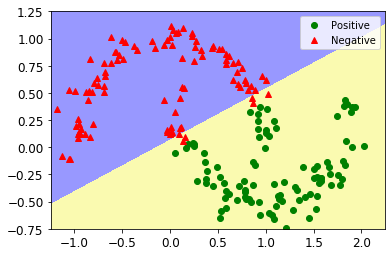

In [15]:
# plot prediction
y_pred_idx = y_pred.reshape(-1) # 1D array rather than a column vector
plt.plot(X_test[y_pred_idx, 1], X_test[y_pred_idx, 2], 'go', label="Positive")
plt.plot(X_test[~y_pred_idx, 1], X_test[~y_pred_idx, 2], 'r^',label="Negative")
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0']) # yellow and blue
y_predict = y_proba_val2.reshape(x0.shape)
plt.contourf(x0, x1, y_predict, cmap=custom_cmap)
plt.legend()
plt.show()

# Post-Midterm Review

**Topics**

* Nonlinear Conjugate Gradient Methods

* Heavy Ball Method

* Stochastic, Minibatch Gradient Descent

* Least Squares

* Neural Networks, Perceptron, Multilayer Perceptron





## Conjugate Gradient Methods

1. Determine $\alpha_k$ and update $\mathbf{x}_{k+1} = \mathbf{x}_k + \alpha_k\mathbf{p}_k$.
2. Set $\mathbf{p}_{k+1} = -\nabla f_{k+1} + \beta_k\mathbf{p}_k$

For **linear** conjugate gradient method, we have an explicit formula for $\alpha_k, \beta_k$.

For **nonlinear** conjugate gradient methods, we use backtracking / exact line search for $\alpha_k$, while the choice of $\beta_k$ depends on the nonlinear method chosen.

For nonlinear conjugate gradient methods, we can **restart the direction** (set $\beta_k = 0$ every few iterations) to restore the Q-conjugacy of the directions.

* Conjugate gradients converge in $n$ steps for Quadratic functions $f(x) = 1/2 x^T Q x - b^T x$

## Heavy Ball Method

$$ \begin{align*}
    \mathbf{p}_k &= -\nabla f_k \color{red}{- \beta \mathbf{p}_{k-1}} \\
    \mathbf{x}_{k+1} &= \mathbf{x}_k + \alpha\mathbf{p}_k
\end{align*} $$

$\alpha$ is a fixed step size, $\beta$ is a fixed momentum parameter.

Heavy Ball is similar to the conjugate gradient method, except Conjugate Gradient Method will have an adaptive $\alpha$ and $\beta$.

## Convergence of Steepest Descent / Heavy Ball

A function is **strongly convex** if
$$ f(\mathbf{y}) \ge f(\mathbf{x} + \nabla f(\mathbf{x})^T(\mathbf{y} - \mathbf{x}) + \frac{\mu}{2} \|\mathbf{y} - \mathbf{x}\|^2$$

A function is **strongly smoooth** if
$$ f(\mathbf{y}) \le f(\mathbf{x}) + \nabla f(\mathbf{x})^T (\mathbf{y} - \mathbf{x}) + \frac{L}{2} \| \mathbf{y} - \mathbf{x}\|^2$$

$\kappa = L / \mu$, where $L$ is the upper bound for eigenvalues of the Hessian, $\mu$ is the lower bound for eigenvalues of the Hessian.

For **Steepest Descent**:

Optimal step length $\alpha = \frac{2}{L+\mu}$

$$\|x_{k+1} - x^*\| \le \frac{L - \mu}{L + \mu} \|x_k - x^*\|$$

For **Heavy Ball**:

Optimal $$\alpha = \frac{4}{(L^{1/2} + \mu^{1/2})^2}$$

Optimal $$\beta = \frac{(L^{1/2} - \mu^{1/2})^2}{(L^{1/2} + \mu^{1/2})^2}$$

Then $$\|x_{k+1}-x^* \| \le \left(\frac{L^{1/2} - \mu^{1/2}}{L^{1/2} + \mu^{1/2}}\right) \|x_k -x^* \|$$

## Least Squares

**Goal**: Given dataset of inputs and outputs, minimize the sum of squared residuals.

For **Linear Least Squares**, this can be formulated as the problem

$$\min_x \|Ax - b\|^2$$

![Error](https://i.imgur.com/m2GQldd.png)

The **normal equations**:
$$ A^T Ax = A^T b$$

**Solving the normal equations**:
$$x = (A^T A)^{-1} A^T b$$

We can solve a least squares problem either by solving the normal equation, or by performing Gradient descent to find $x$.

Gradient Descent has the advantage of not having to invert a matrix.

## Overfitting/Underfitting

**Overfitting**: When your model fits too well to your training set, limiting its performance when predicting new data.

**Underfitting**: When your model is too simplistic to fit well to the training set.

![img](https://miro.medium.com/max/1400/1*_7OPgojau8hkiPUiHoGK_w.png)

# Neural Networks

Neural networks consist of interconnected **neurons**, with inputs to the neuron consisting of weighted outputs of other neurons.

They're used to find a function which fits to arbitrary data points.

This function using Gradient Descent: The loss function $E$ represents the difference between the predicted and actual values of the output. The gradients $\frac{\partial E}{\partial w_{jk}$ are found then used to update each $w$ in Gradient Descent.

The way this works in the algorithm is:

1. Forward propagation of the network:
![img](https://i.imgur.com/s2Pm2WW.png)

Compute the outputs of each of the intermediate neurons to get the final outputs $y_1,\dots y_n$.

2. Compute the gradients of the weights in the outer layer.

These gradients can be found using the outputs of all the neurons, so $\frac{\partial E}{\partial w_{jk}^o}$ can be calculated.

3. Compute the gradients of the weights in the hidden layer before the outer layer.

These gradients can be founding using the gradients of the weights in the outer layer, so $\frac{\partial E}{\partial w_{jk}^h}$ can be found.

4. Continue like this until you've found all the gradients in the network.

5. Update weights: $w_{jk} = w_{jk} - \eta \frac{\partial E}{\partial w_{jk}}$

# Sample Questions

1. True/False: The following decision boundary could be the decision boundary of a Perceptron.

True/False: The following decision boundary could be the decision boundary of a Multi-Layer Perceptron.

True/False: The following decision boundary could be the decision boundary of a logistic regression model.


<div>
<img src="https://i.stack.imgur.com/LZWS8.png" width="300">
</div>

2. True/False: The following data is linearly separable.

![img](https://i.imgur.com/sSVTstp.png)

3. Why do we introduce a **variable learning schedule** when performing Stochastic Gradient Descent?

4. Given a strongly convex and strongly smooth function with smallest
eigenvalue of the Hessian equal to U and largest eigenvalue equal to L, which
of the following represents the optimal fixed value of $\beta$ to use in the
heavyball method? 

    a.) $\beta = \frac{(L - U)^2}{(L + U)^2}$

    b.)  $\beta = \frac{(L^{1/2} - U^{1/2})^2}{(L^{1/2} + U^{1/2})^2}$

    c.)  $\beta = \frac{(L - U)}{(L + U)}$

    d.)  $\beta = \frac{\kappa - 1}{\kappa + 1}$

5.) We want to minimize $\| Ax - b \|^2$ given an $m \times n$ matrix $A$, a $n \times 1$ vector $x$, and a $m \times 1$ matrix $b$. $m$ is the number of input data points, $n$ is the number of input features.

If we want to minimize this by solving the normal equations $x^* = (A^T A)^{-1}A^T b$, which combination of dimensions $m,n$ would require the most computations?

   a.) $m = 100, n = 125$

   b.) $m = 25, n = 500$

   c.) $m = 500, n = 25$

   d.) $m = 50, n = 250$

   
   
6.) Why would we want to use stochastic or minibatch gradient descent instead of batch gradient descent?
  
      a.) Stochastic gradient descent approaches the minimizer with less oscillation than batch gradient descent.

      b.) Minibatch gradient descent updates the value of x fewer times per epoch.

      c.) Batch gradient descent calculates the gradient using all of the data points, which is computationally expensive.

      d.) Stochastic gradient descent always converges faster than Batch Gradient Descent.